In [54]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [56]:
data = np.load('reg_data_noise.npy')

In [57]:
xs = data[:,0]
ys = data[:,1]

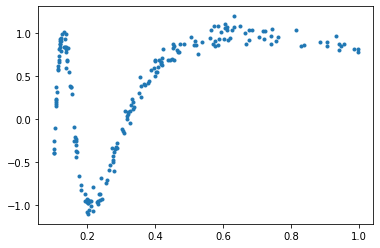

In [58]:
plt.plot(xs,ys,'.');

In [59]:
model = torch.nn.Sequential(torch.nn.Linear(1, 50),
                            torch.nn.Tanh(), torch.nn.Linear(50, 50),
                            torch.nn.Tanh(), torch.nn.Linear(50, 1))

In [60]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)

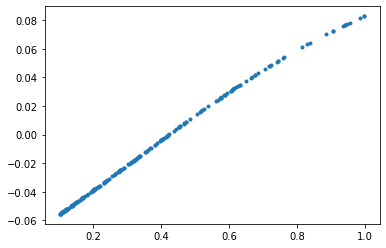

In [61]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [62]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [63]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))

In [77]:
optimizer = torch.optim.Adam(model.parameters(),lr =0.01)

In [74]:
loss_func = torch.nn.MSELoss()
err_train=[]
err_valid=[]

In [78]:
%%time
model.to('cuda')

for epoch in range(30000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features.to('cuda'))
        loss = loss_func(pred, target.to('cuda'))
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0].to('cuda'))
        vloss  = loss_func(vpred,valid_set[:][1].to('cuda'))
        err_valid.append(vloss)
        pred  = model(train_set[:][0].to('cuda'))
        loss  = loss_func(pred,train_set[:][1].to('cuda'))
        err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss))   

epoch 0 0.021057 0.014870 
epoch 1000 0.020682 0.014650 
epoch 2000 0.020330 0.014440 
epoch 3000 0.019998 0.014239 
epoch 4000 0.019685 0.014046 
epoch 5000 0.019390 0.013860 
epoch 6000 0.019109 0.013680 
epoch 7000 0.018843 0.013507 
epoch 8000 0.018590 0.013339 
epoch 9000 0.018348 0.013176 
epoch 10000 0.018117 0.013017 
epoch 11000 0.017896 0.012864 
epoch 12000 0.017683 0.012713 
epoch 13000 0.017480 0.012567 
epoch 14000 0.017283 0.012424 
CPU times: user 51.7 s, sys: 734 ms, total: 52.4 s
Wall time: 52.9 s


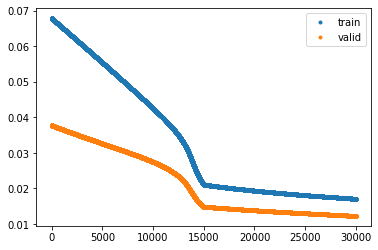

In [79]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

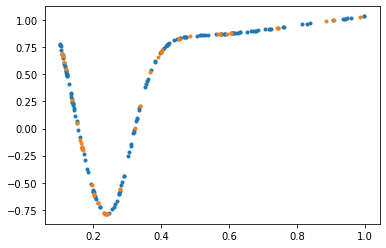

In [71]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')

In [80]:
torch.save(model, "model.pt")